<a href="https://colab.research.google.com/github/gogog01-29-2021/241102-FBAQuant-1st-Capstone/blob/main/FBA_FE_HW1_ReferenceJML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1.

In [ ]:
import math

A = 15000
r = 0.06
t = 23

#(a) simple interest
A_a = (1+r*t)*A

#(b) interest compounded annually
A_b = (1+r)**t*A

#(c) interest compounded quarterly
A_c = (1+r/4)**(t*4)*A

#(d) interest compounded monthly
A_d = (1+r/12)**(t*12)*A

#(e) interest compounded continuously
A_e = math.exp(r*t)*A

print("Answers:\n")
print("Answer of (a) is", A_a)
print("Answer of (b) is", A_b)
print("Answer of (c) is", A_c)
print("Answer of (d) is", A_d)
print("Answer of (e) is", A_e)



Answers:

Answer of (a) is 35700.0
Answer of (b) is 57296.24492359587
Answer of (c) is 59015.64336415907
Answer of (d) is 59418.858440729586
Answer of (e) is 59623.52441242122


Problem 2.

In [ ]:
import math

N = 50
p = 0.01
v_lambda = N * p

def factorial(n):
    return n * factorial(n-1) if n > 0 else 1

def poisson(v_lambda, k):
    return (v_lambda**k)*math.exp(-v_lambda)/factorial(k)


P_atleastonce = 1-(1-0.01)**50
P_atleastonce_Poisson = 1-poisson(v_lambda, 0)

P_exactlytwice = 50*49/2*0.01**2*(1-0.01)**48
P_exactlytwice_Poisson = poisson(v_lambda, 2)

P_atleasttwice = P_atleastonce-50*0.01*(1-0.01)**49
P_atleasttwice_Poisson = 1-poisson(v_lambda, 0)-poisson(v_lambda, 1)

print("Answer of (a) of binomial is", P_atleastonce)
print("Answer of (a) of poisson is", P_atleastonce_Poisson)
print("\n")
print("Answer of (b) of binomial is", P_exactlytwice)
print("Answer of (b) of poisson is", P_exactlytwice_Poisson)
print("\n")
print("Answer of (c) of binomial is", P_atleasttwice)
print("Answer of (c) of poisson is", P_atleasttwice_Poisson)


Answer of (a) of binomial is 0.39499393286246365
Answer of (a) of poisson is 0.3934693402873666


Answer of (b) of binomial is 0.07561804226543029
Answer of (b) of poisson is 0.07581633246407918


Answer of (c) of binomial is 0.08943531309603114
Answer of (c) of poisson is 0.09020401043104986


Problem 3.

3-(a). $$------------------------------------$$

$$
f_{X,Y}(x,y) = f_{X|Y}(x \mid y) f_Y(y)
$$


$$
f_{X|Y}(x \mid y) = \frac{1}{\sqrt{2\pi v^2}} \exp\left(-\frac{(x - y)^2}{2v^2}\right)
$$

$$
f_Y(y) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y - \mu)^2}{2\sigma^2}\right)
$$


$$
f_{X,Y}(x,y) = \frac{1}{\sqrt{2\pi v^2}} \exp\left(-\frac{(x - y)^2}{2v^2}\right) \cdot \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y - \mu)^2}{2\sigma^2}\right)
$$


$$
f_X(x) = \int_{-\infty}^{\infty} f_{X|Y}(x \mid y) f_Y(y) \, dy
$$

$$
f_X(x) = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi v^2}} \exp\left(-\frac{(x - y)^2}{2v^2}\right) \cdot \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y - \mu)^2}{2\sigma^2}\right) \, dy
$$

$$
X \sim N(\mu, \sigma^2 + v^2)
$$


3-(b). $$-----------------------------------------$$


$$
M_X(t) = E(e^{tX}) = E[E(e^{tX} \mid Y)]
$$

$$
E(e^{tX} \mid Y = y) = \exp\left(ty + \frac{t^2 v^2}{2}\right)
$$

$$
M_X(t) = E\left[\exp\left(tY + \frac{t^2 v^2}{2}\right)\right] = \exp\left(\frac{t^2 v^2}{2}\right) \cdot E\left[\exp(tY)\right]
$$

$$
E(e^{tY}) = \exp\left(t\mu + \frac{t^2 \sigma^2}{2}\right)
$$

$$
M_X(t) = \exp\left(\frac{t^2 v^2}{2}\right) \cdot \exp\left(t\mu + \frac{t^2 \sigma^2}{2}\right) = \exp\left(t\mu + \frac{t^2 (\sigma^2 + v^2)}{2}\right)
$$

Problem 4.

체비셰프 부등식:
$$
P[X \ge \mu + k] \le \frac{\sigma^2}{\sigma^2 + k^2}
$$

In [ ]:
import numpy as np
from scipy.stats import norm

mu = 100
sigma2 = 1
T = 10
S_T_mean = mu
S_T_variance = T * sigma2

# (a) 체비셰프 부등식을 사용한 확률 계산
prob_chebyshev = S_T_variance / (S_T_variance+(105-mu)**2)

# (b) 정규분표를 이용한 확률 계산: 평균이 0, 분산이 10인 변수로 계산
prob_normal = 1 - norm.cdf(105, loc=S_T_mean, scale=np.sqrt(S_T_variance))

print(f"Answer of (a): {prob_chebyshev:.4f}")
print(f"Answer of (b): {prob_normal:.4f}")

Answer of (a): 0.2857
Answer of (b): 0.0569


시뮬레이션에 의한 주가가 105를 초과할 확률: 0.0589


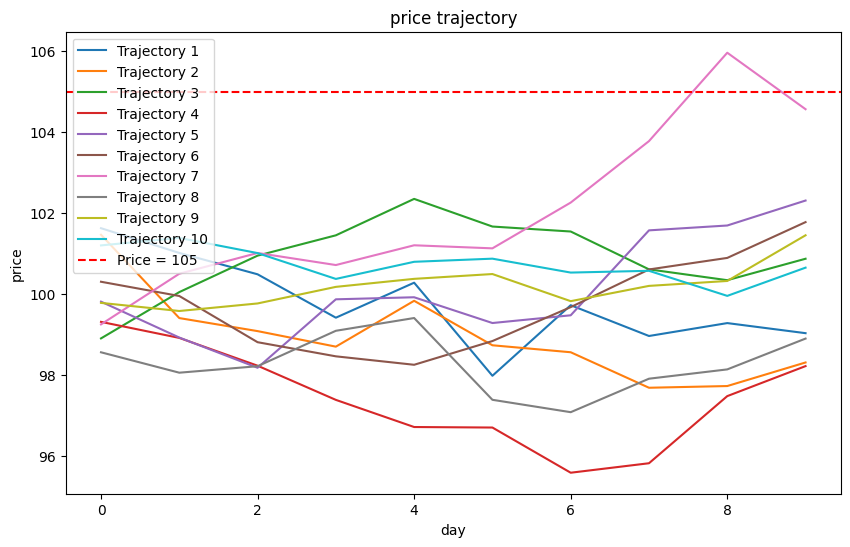

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시뮬레이션 파라미터
M = 10000  # 시뮬레이션 수
T = 10  # 시간 길이
initial_price = 100
sigma2 = 1

# 시뮬레이션 수행
np.random.seed(1)
W = np.random.normal(0, np.sqrt(sigma2), (M, T))
S = np.cumsum(W, axis=1) + initial_price

# 10일 후 주가가 105를 초과하는지 확인
S_T = S[:, -1]
prob_simulation = np.mean(S_T > 105)

print(f"시뮬레이션에 의한 주가가 105를 초과할 확률: {prob_simulation:.4f}")

# 첫 10개의 궤적을 시각화
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(range(T), S[i, :], label=f'Trajectory {i+1}')
plt.axhline(105, color='r', linestyle='--', label='Price = 105')
plt.title('price trajectory')
plt.xlabel('day')
plt.ylabel('price')
plt.legend()
plt.show()

Problem 5.

In [ ]:
given a continuous nonlinear function f:R->R, we seek a point x* which is element o fR s.t. f(x*)=0
Interval Bisection
Fixed-Point Iteration
Newton's Method
Secant Method


In [ ]:
import time
import numpy as np

def f(lam):
    return -1+lam+lam**2

def f_prime(lam):
    return 1+2*lam

def method1(lam0, tol=1e-6, iter = 10000):
    lam = lam0
    for i in range(iter):
        lam_next = lam-(f(lam)/f_prime(lam))
        if abs(lam_next-lam)<tol:
            return lam_next, i+1
        lam=lam_next
    return lam, 1000

lam0 = 1


start_time = time.time()
lamb_newton, iterations_newton = method1(lam0)
end_time = time.time()

print(f'lambda value after 1000 iteration is: {lamb_newton:.8f} ')
print(f'반복 횟수: {iterations_newton}, 계산 시간: {end_time - start_time:.6f} 초')

def bisection_method(a, b, tol=1e-6, max_iter=10000):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a)와 f(b)는 반대 부호여야 합니다.")

    for i in range(max_iter):
        c = (a + b) / 2.0
        if abs(f(c)) < tol or abs(b - a) / 2 < tol:
            return c, i+1

        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

    return c, 10000

a, b = 0.0, 2.0

start_time = time.time()
root_bisection, iterations_bisection = bisection_method(a, b)
end_time = time.time()

# 결과 출력
print(f"이분법의 근사값: {root_bisection:.6f}")
print(f"반복 횟수: {iterations_bisection}, 계산 시간: {end_time - start_time:.6f} 초")

lambda value after 1000 iteration is: 0.61803399 
반복 횟수: 4, 계산 시간: 0.000119 초
이분법의 근사값: 0.618034
반복 횟수: 18, 계산 시간: 0.000135 초


Problem 6.

In [ ]:
import numpy as np
import random
M = 100000
success = 0
N = 3

for i in range(M):
    angles = []
    for i in range(N):
        theta = random.uniform(0, 360)
        angles.append(theta)
    angles = np.sort(angles)
    threshold = angles[0] + 180

    if  angles[-1]-angles[0]<=180:
        success +=1
    else:
        # 첫 번째 배열: angles[0]부터 threshold 사이의 값들
        first_half = angles[angles <= threshold]

        # 두 번째 배열: threshold보다 큰 값들
        second_half = angles[angles > threshold]
        if first_half[-1]-(second_half[0]-360)<=180: # angles[0] 기준으로 중심과 잇는 직선을 긋고, 양쪽 영역에서 angles[0]에서 가장 먼 점들
            success+=1

probability = success/M

print(f"N={N}일 때, 모든 점이 한 반원 안에 위치할 확률: {probability}")




N=3일 때, 모든 점이 한 반원 안에 위치할 확률: 0.75104
